In [98]:
#Analysis of TARGET-AML data from TCGA for investigation of cell line with JAK2-V617F mutation
#CSCI 5461
#Nitzan Friedberg, Spring 2024

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data from Liver tumor, not used in this analysis
J617F_Data_Liver = pd.read_csv('V617F_Mutation.augmented_star_gen', delimiter='\t')

#Clustering Data using built in TCGA tools, not used in this analysis
TARGET_AML_Clustering_Data = pd.read_csv('GeneExpression.2024-04-30.tsv', delimiter='\t')

TARGET_AML_Clustering_Data = TARGET_AML_Clustering_Data.T

#RNA seq data  that includes the JAK2 V617F mutation
J617F_Data = pd.read_csv('V617F_Data/1a2aea59-c3fd-4d5a-8f76-b07188607df6.rna_seq.augmented_star_gen', delimiter='\t', skiprows=1)

J617F_Data.set_index('gene_name', inplace=True)

#genes of interest
genes_to_search = ['CBFB','CBFA2T2', 'CBFA2T3','RUNX1','RUNX1T1', 'MCL1' ,'XIAP', 'TOP1', 'TUBB', 'TUBA4A', 'LAMTOR5', 'PIK3IP1', 'PIK3C2A' ]
results_df = pd.DataFrame(columns=['Gene', 'TPM'])



for gene in genes_to_search:
    expression_data = J617F_Data.loc[gene,  'tpm_unstranded']
    results_df = pd.concat([results_df, pd.DataFrame({'Gene': [gene], 'TPM': expression_data})], ignore_index=True)

V617F_CBFB_Freq = J617F_Data.loc['CBFB', 'tpm_unstranded']
V617F_RUNX1_Freq = J617F_Data.loc['RUNX1', 'tpm_unstranded']
V617F_RUNX1T1_Freq = J617F_Data.loc['RUNX1T1', 'tpm_unstranded']



In [99]:
import os

root_folder = 'TARGET_AML_DATA'  
expression_values = []
all_gene_data = pd.DataFrame()
total_files = sum(len(files) for _, _, files in os.walk(root_folder))
files_processed = 0

# Traverse through the root folder
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith(".tsv"):
            file_path = os.path.join(subdir, file)
            # Read the file into a DataFrame
            geneCounts = pd.read_csv(file_path,  delimiter='\t', skiprows=1)

                # Check if the gene exists in the DataFrame
            for gene_identifier in gene_names:
                if gene_identifier in geneCounts['gene_name'].values:
                    gene_row = geneCounts[geneCounts['gene_name'] == gene_identifier]
                    all_gene_data = pd.concat([all_gene_data, gene_row], axis=0, ignore_index=True)

        files_processed += 1
        # print("Processed {} out of {} files.".format(files_processed, total_files))








In [100]:
# Group the DataFrame by gene_name column
gene_groups = expression_values.groupby('gene_name')

#store DataFrames for each gene_name
gene_dataframes = {}
for gene_name, group_df in gene_groups:
    gene_dataframes[gene_name] = group_df.copy()


tpm_vals_CBFB = gene_dataframes['CBFB'].loc[:, ['tpm_unstranded']]
tpm_vals_RUNX1 = gene_dataframes['RUNX1'].loc[:, ['tpm_unstranded']]
tpm_vals_RUNX1T1 = gene_dataframes['RUNX1T1'].loc[:, ['tpm_unstranded']]

Text(181.94444444444446, 0.5, '')

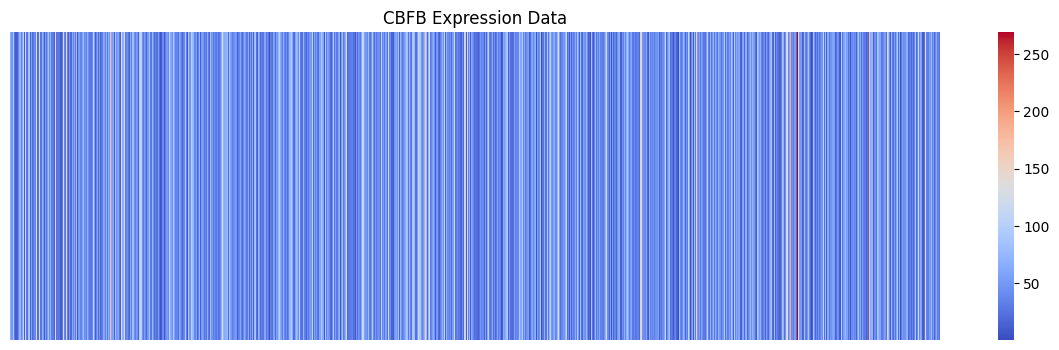

In [103]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

sns.heatmap(tpm_vals_CBFB.transpose(), cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
plt.show

plt.title('CBFB Expression Data')
plt.xlabel('')
plt.ylabel('')



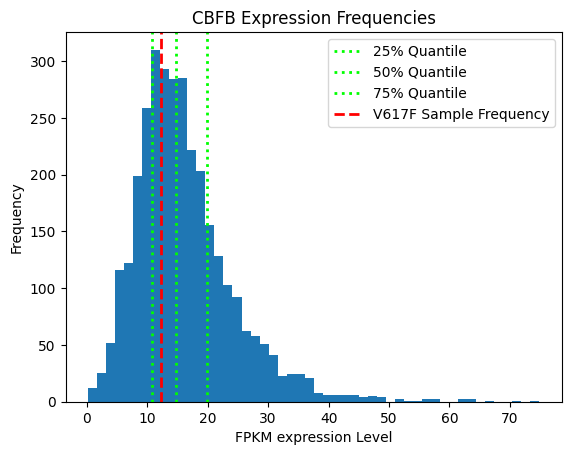

In [ ]:
import numpy as np

plt.hist(tpm_vals_CBFB, bins = 50)

plt.title('CBFB Expression Frequencies')
plt.xlabel('tpm expression Level')
plt.ylabel('Frequency')

quantiles = [25, 50, 75]  # desired quantiles
quantile_values = np.percentile(tpm_vals_CBFB, quantiles)
for quantile, value in zip(quantiles, quantile_values):
    plt.axvline(x=value, color='lime', linestyle=':', linewidth=2, label=f'{quantile}% Quantile')


plt.axvline(x=V617F_CBFB_Freq, color='red', linestyle='--', linewidth=2, label='V617F Sample Frequency')
plt.legend()

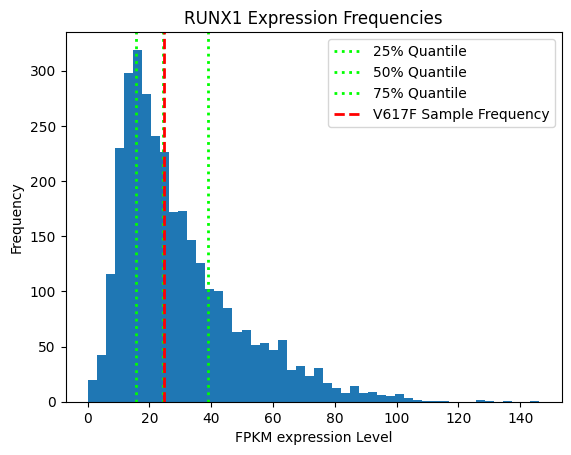

In [ ]:
plt.hist(tpm_vals_RUNX1, bins = 50)

plt.title('RUNX1 Expression Frequencies')
plt.xlabel('tpm expression Level')
plt.ylabel('Frequency')

quantiles = [25, 50, 75]  # desired quantiles
quantile_values = np.percentile(tpm_vals_RUNX1, quantiles)
for quantile, value in zip(quantiles, quantile_values):
    plt.axvline(x=value, color='lime', linestyle=':', linewidth=2, label=f'{quantile}% Quantile')


plt.axvline(x=V617F_RUNX1_Freq, color='red', linestyle='--', linewidth=2, label='V617F Sample Frequency')
plt.legend()

In [ ]:
CMAP_compounds = pd.read_csv('CMAP_compounds.txt', delimiter='\t', skiprows=1)
PRISM_compounds = pd.read_csv('PRISM_compounds.txt', delimiter='\t', skiprows=1)

duplicates = pd.merge(CMAP_compounds, PRISM_compounds, on='Name', how='inner')

print("Duplicate Names:")
print(duplicates)


Duplicate Names:
    Rank  Score Type             ID        Name  \
0     85  88.10   cp  BRD-A36630025       SN-38   
1    136  82.39   cp  BRD-K12502280   TG-101348   
2    441  59.79   cp  BRD-K79090631   CGP-60474   
3    953  38.01   cp  BRD-K51575138      TPCA-1   
4    968  37.55   cp  BRD-K60230970      MG-132   
5   2697   6.94   cp  BRD-U68942961   JW-7-24-1   
6   3618   2.26   cp  BRD-K15592317    CP466722   
7   3949   1.41   cp  BRD-U33728988    QL-X-138   
8   4180   0.81   cp  BRD-K67868012      PI-103   
9   4397   0.21   cp  BRD-K04853698  LDN-193189   
10  4884   0.00   cp  BRD-K24681473      YM-155   
11  6499   0.00   cp  BRD-K94294671     OSI-027   
12  7630 -10.37   cp  BRD-U86922168   QL-XII-47   
13  8439 -76.91   cp  BRD-K28360340       TW-37   

                          Description  
0             Topoisomerase inhibitor  
1                      FLT3 inhibitor  
2                       CDK inhibitor  
3                       IKK inhibitor  
4                

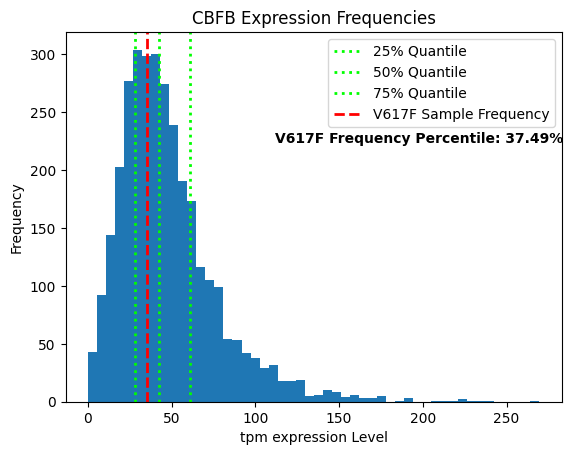

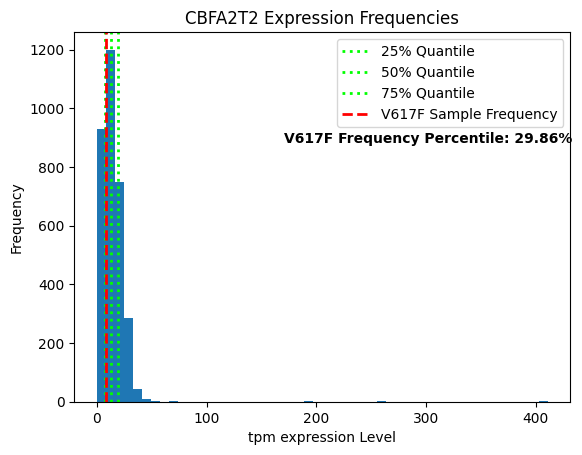

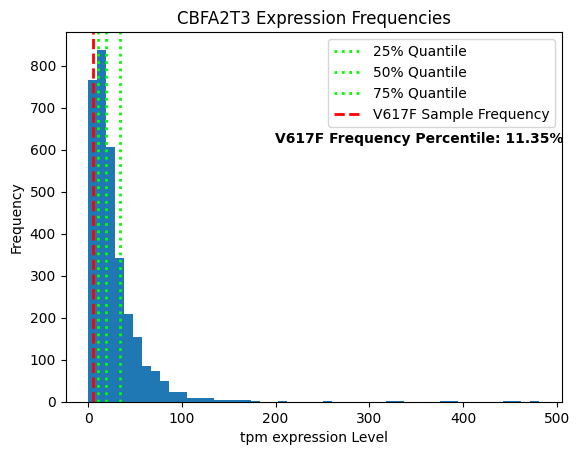

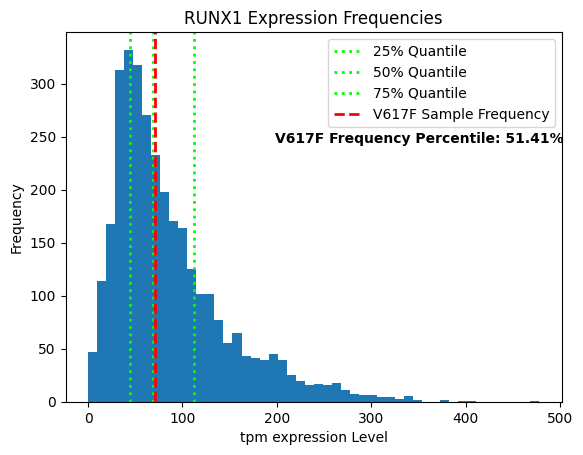

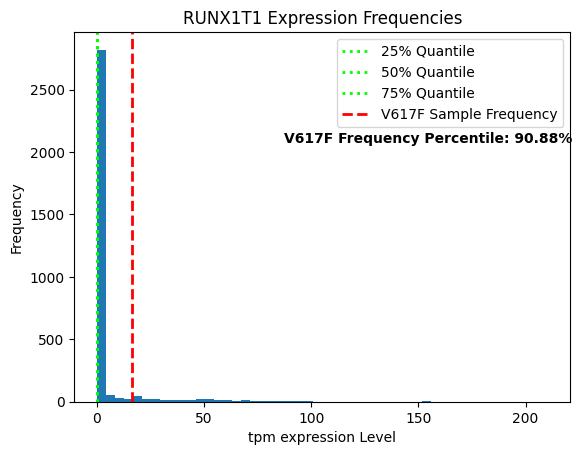

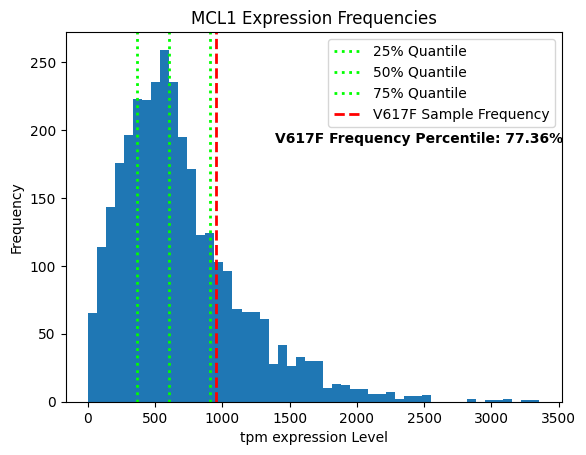

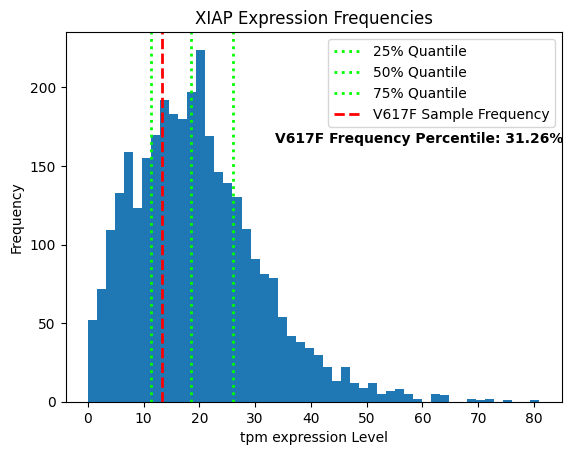

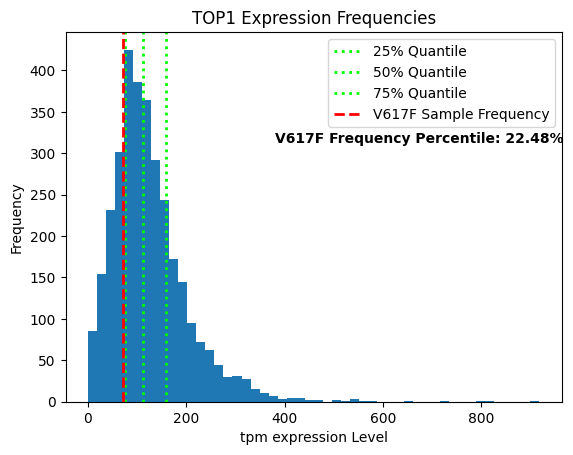

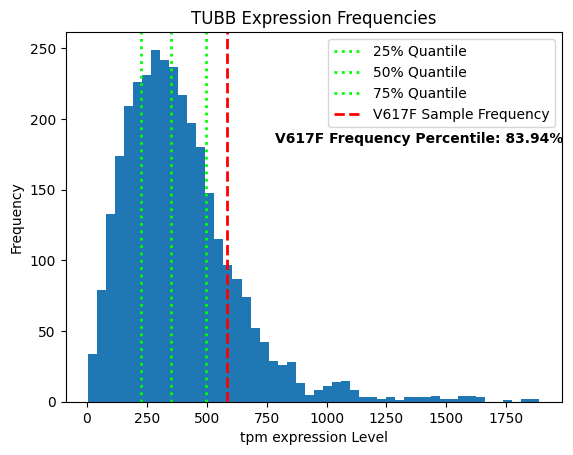

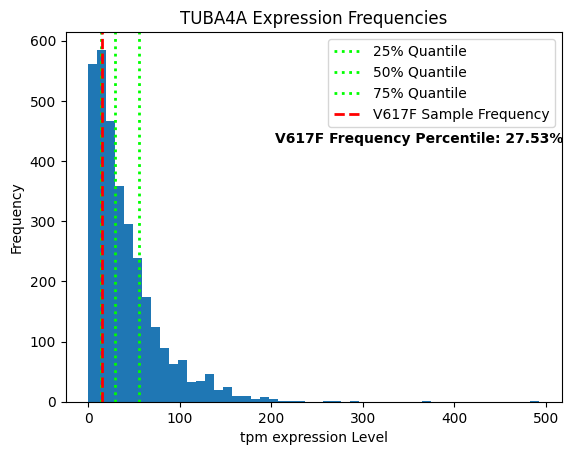

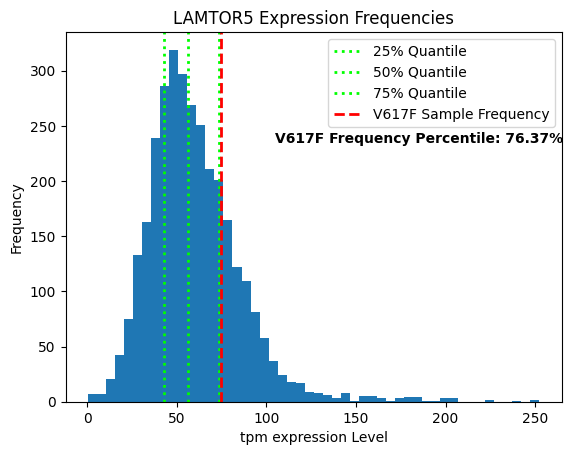

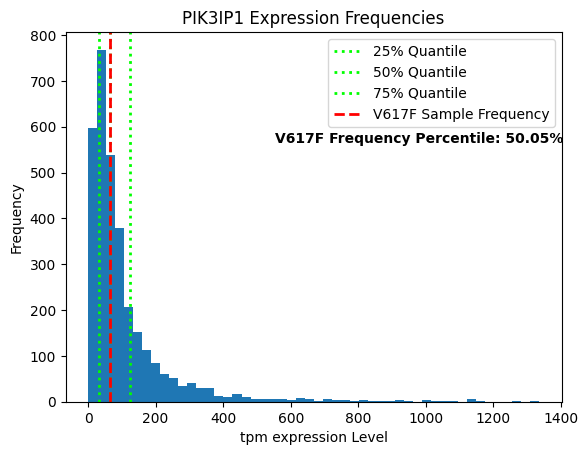

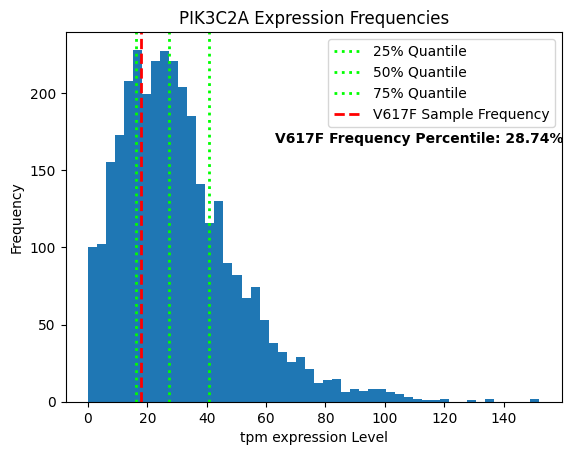

In [102]:
from scipy.stats import percentileofscore

for gene in genes_to_search:
    # Extract expression values for the current gene
    expression_data = gene_dataframes[gene].loc[:, ['tpm_unstranded']]
    
    # Create histogram
    plt.hist(expression_data, bins=50)

    # Add title and labels
    plt.title(f'{gene} Expression Frequencies')
    plt.xlabel('tpm expression Level')
    plt.ylabel('Frequency')

    # Calculate desired quantiles
    quantiles = [25, 50, 75]
    quantile_values = np.percentile(expression_data, quantiles)
    for quantile, value in zip(quantiles, quantile_values):
        plt.axvline(x=value, color='lime', linestyle=':', linewidth=2, label=f'{quantile}% Quantile')

    
    V617F_gene_Freq = results_df.loc[results_df['Gene'] == gene, 'TPM'].iloc[0]

    # Add V617F Sample Frequency line
    plt.axvline(x=V617F_gene_Freq, color='red', linestyle='--', linewidth=2, label='V617F Sample Frequency')

    gene_freq_percentile = percentileofscore(expression_data['tpm_unstranded'], V617F_gene_Freq)

    plt.text(plt.xlim()[1]* 0.7, plt.ylim()[1] * 0.7, f'V617F Frequency Percentile: {gene_freq_percentile:.2f}%', weight='bold')
    plt.box(on=True)
    plt.legend()
    plt.show()